# Notes

#### 1) Scale variables when needed
#### 2) Permanently removed restecgand fbs from dataset 
#### --
<!--  -->dataset.drop(labels=['restecg_0', 'restecg_1',
<!--  -->'restecg_2', 'fbs_0', 'fbs_1'], axis=1,inplace=True)

# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


# Data Collection and Preprocessing

In [2]:
data = pd.read_csv('HeartDiseaseDataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe(include=[np.number])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
for col in data:
    print(col," : ",data[col].unique())
    print()

age  :  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

sex  :  [1 0]

cp  :  [3 2 1 0]

trestbps  :  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

chol  :  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 

In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Distribution of Heart Disease

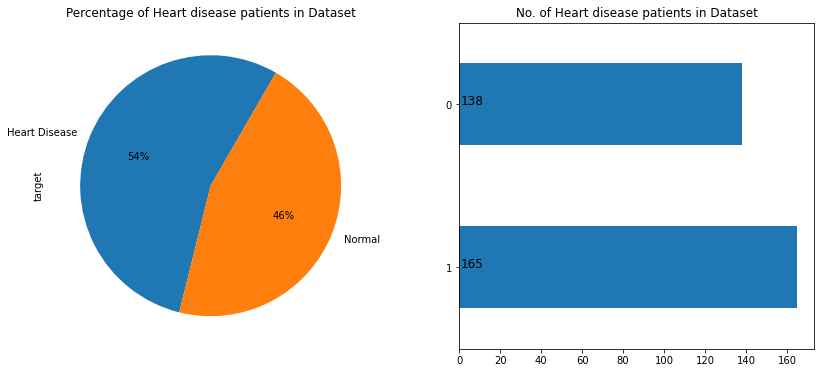

In [11]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = data['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

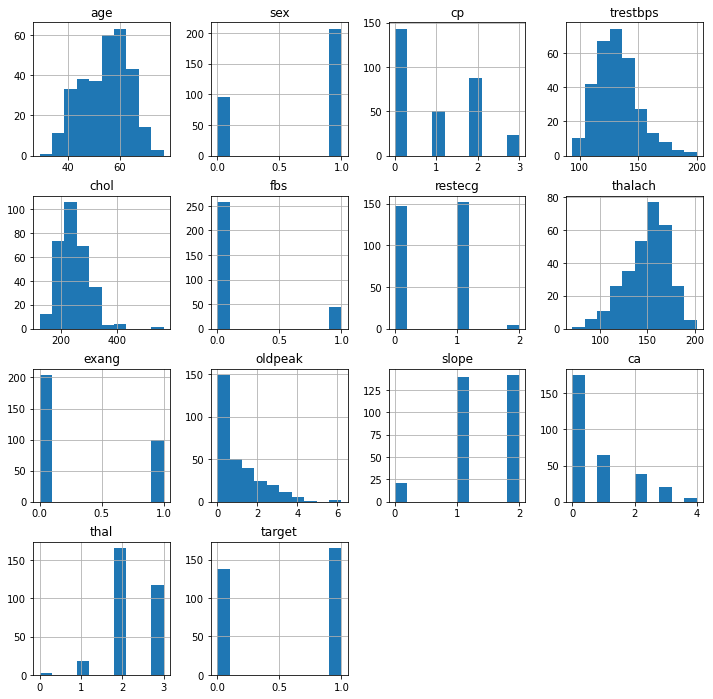

In [12]:
data.hist(figsize=(12,12))

In [13]:
dataset = pd.get_dummies(data, columns=['sex','cp','exang','slope','ca','thal'])

In [14]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak',
       'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [15]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak',
       'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [16]:
dataset.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,target,sex_0,sex_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,1,0,150,2.3,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,0,1,187,3.5,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,0,0,172,1.4,1,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,0,1,178,0.8,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,0,1,163,0.6,1,1,0,...,1,1,0,0,0,0,0,0,1,0


### finding dropping features that are not important

In [17]:
data_dup = dataset.duplicated().any()
data_dup

True

In [18]:
dataset = dataset.drop_duplicates()

In [19]:
data_dup = dataset.duplicated().any()
data_dup

False

 # Splitting the Features and Targets

In [20]:
X = dataset.drop(columns='target', axis=1)
Y = dataset['target']

In [21]:
print(X.shape)
print(Y.shape)

(302, 27)
(302,)


# Splitting Data into Training and Testing

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=123)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 27)
(61, 27)
(241,)
(61,)


# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Training

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [27]:
model = Sequential(
    [
        tf.keras.Input(shape=(27,)),
        Dense(units=25, activation='sigmoid'),
        Dense(units=20, activation='sigmoid'),
        Dense(units=15, activation='sigmoid'),
        Dense(units=10, activation='sigmoid'),
        Dense(units=5, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ], name = "my_model"
)

In [28]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                700       
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,756
Trainable params: 1,756
Non-trainable 

In [29]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.Adam(0.001),
             metrics=['accuracy'])

In [30]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.7496 - accuracy: 0.4564
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7400 - accuracy: 0.4564
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7323 - accuracy: 0.4564
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.4564
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7187 - accuracy: 0.4564
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7127 - accuracy: 0.4564
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.4564
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.4564
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.4564
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.4564
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.9087
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.9087
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.9087
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.9087
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.9087
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.9087
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.9129
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.9129
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.9129
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.9129
Epoch 94/100
8/8 [===============

# Saving and loading model using "joblib"

In [31]:
path=r'C:\Users\Nida Shaikh\JuPyNB\DataScience\Projects\Tensorflow\LogisticRegression/Weights'

In [32]:
model.save_weights(path)

In [33]:
model.load_weights(path)

In [34]:
model.save(r'C:\Users\Nida Shaikh\JuPyNB\DataScience\Personal\NPCI/my_model')

INFO:tensorflow:Assets written to: C:\Users\Nida Shaikh\JuPyNB\DataScience\Personal\NPCI/my_model\assets


# Testing on x_test data

In [35]:
pred_values = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [36]:
for i in range(pred_values.shape[0]):
    if pred_values[i]>=0.5:
        pred_values[i] = 1
    else :
        pred_values[i] = 0

In [37]:
test_accuracy = accuracy_score(pred_values,y_test)

In [38]:
test_accuracy

0.8360655737704918

### Evaluating overfit or underfit by predicting training data and comparing with test data accuracy

In [39]:
train_pred_values = model.predict(X_train)
for i in range(train_pred_values.shape[0]):
    if train_pred_values[i]>=0.5:
        train_pred_values[i] = 1
    else :
        train_pred_values[i] = 0
train_accuracy = accuracy_score(train_pred_values,y_train)
train_accuracy

8/8 [==============================] - 0s 2ms/step


0.91701244813278

In [40]:
# Overfitting model when train_accuracy > test_accuracy

# Building Predictive system

In [41]:
#  FOR TKINTER GUI REFER
#  https://www.youtube.com/watch?v=4LX64MDPikc

# Feature Importance

In [42]:
# print("Feature importances:\n{}".format(model.feature_importances_))

In [43]:
# def plot_feature_importances_diabetes(model):
#     plt.figure(figsize=(8,6))
#     n_features = 13
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), X)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1, n_features)
# plot_feature_importances_diabetes(dataset)
# plt.savefig('feature_importance')